# Overfitting 감소

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 하이퍼파라미터 정의

In [3]:
EPOCH = 50

## 네트워크 구조 정의

In [15]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(64, activation='relu')
    self.dense2 = tf.keras.layers.Dense(64, activation='relu')
    self.dense3 = tf.keras.layers.Dense(64, activation='relu')
    self.dense4 = tf.keras.layers.Dense(64, activation='relu')
    self.dense5 = tf.keras.layers.Dense(10, activation='softmax')

  def call(self, x, training=False, mask=None):
    h = self.flatten(x)
    h = self.dense1(h)
    h = self.dense2(h)
    h = self.dense3(h)
    h = self.dense4(h)
    return self.dense5(h)

## 데이터 불러오기

In [14]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32).prefetch(2048)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32).prefetch(2048)

## 모델 생성

In [16]:
model = MyModel()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 모델 학습

In [17]:
history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCH)

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5196 - accuracy: 0.8148 - val_loss: 0.4615 - val_accuracy: 0.8323
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3805 - accuracy: 0.8594 - val_loss: 0.3854 - val_accuracy: 0.8617
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3482 - accuracy: 0.8727 - val_loss: 0.4004 - val_accuracy: 0.8544
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3240 - accuracy: 0.8802 - val_loss: 0.3662 - val_accuracy: 0.8685
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3080 - accuracy: 0.8859 - val_loss: 0.3776 - val_accuracy: 0.8696
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2948 - accuracy: 0.8892 - val_loss: 0.3438 - val_accuracy: 0.8755
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2829 - accuracy: 0.8943 - val_loss: 0.3411 - val_accuracy:

## Matplotlib을 이용한 시각화

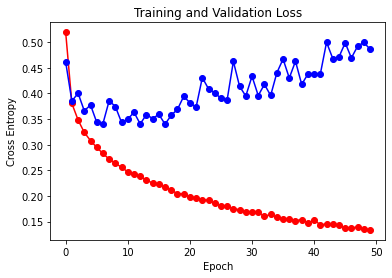

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-')
plt.plot(val_loss, 'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

## Early Stopping Callback

In [19]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [20]:
history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCH, callbacks=[earlystopper])

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1388 - accuracy: 0.9487 - val_loss: 0.5149 - val_accuracy: 0.8847
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1316 - accuracy: 0.9495 - val_loss: 0.5105 - val_accuracy: 0.8829
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1304 - accuracy: 0.9503 - val_loss: 0.5268 - val_accuracy: 0.8866
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1301 - accuracy: 0.9495 - val_loss: 0.5288 - val_accuracy: 0.8861
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1296 - accuracy: 0.9508 - val_loss: 0.5284 - val_accuracy: 0.8866
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1273 - accuracy: 0.9504 - val_loss: 0.5233 - val_accuracy: 0.8874
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1248 - accuracy: 0.9523 - val_loss: 0.5230 - val_accuracy:

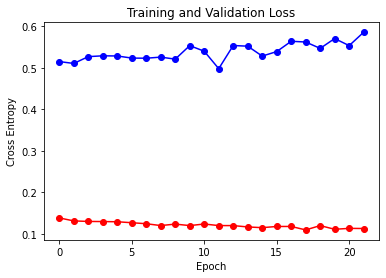

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-')
plt.plot(val_loss, 'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

## Dropout

In [22]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(64, activation='relu')
    self.dense2 = tf.keras.layers.Dense(64, activation='relu')
    self.dense3 = tf.keras.layers.Dense(64, activation='relu')
    self.dense4 = tf.keras.layers.Dense(128, activation='relu')
    self.dropout4 = tf.keras.layers.Dropout(0.5)
    self.dense5 = tf.keras.layers.Dense(10, activation='softmax')

  def call(self, x, training=False, mask=None):
    h = self.flatten(x)
    h = self.dense1(h)
    h = self.dense2(h)
    h = self.dense3(h)
    h = self.dense4(h)
    h = self.dropout4(h)
    return self.dense5(h)

In [23]:
model = MyModel()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCH, callbacks=[earlystopper])

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5902 - accuracy: 0.7908 - val_loss: 0.4296 - val_accuracy: 0.8382
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4153 - accuracy: 0.8521 - val_loss: 0.3993 - val_accuracy: 0.8556
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3775 - accuracy: 0.8644 - val_loss: 0.4123 - val_accuracy: 0.8562
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3504 - accuracy: 0.8742 - val_loss: 0.3814 - val_accuracy: 0.8591
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3356 - accuracy: 0.8776 - val_loss: 0.3772 - val_accuracy: 0.8680
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3218 - accuracy: 0.8835 - val_loss: 0.3808 - val_accuracy: 0.8651
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3104 - accuracy: 0.8874 - val_loss: 0.3641 - val_accuracy:

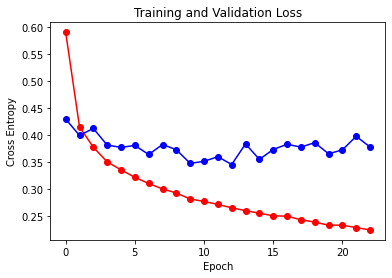

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-')
plt.plot(val_loss, 'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()